In [135]:
import pandas as pd
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("forestfires.csv")

# Eda

In [3]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

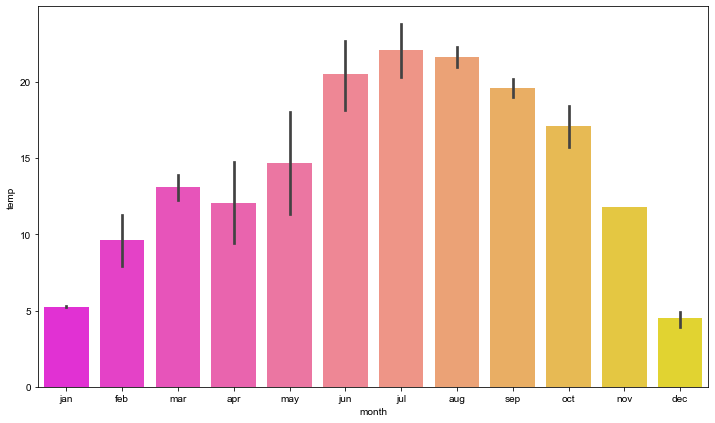

In [5]:
plt.figure(figsize=(12,7))
sp.barplot(x="month",y="temp",data=df,palette="spring",order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov"
                                                             ,"dec"])
sp.set(font_scale=1.5)

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [40]:
x=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']]
y=df["size_category"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

# Using polynomial kernel

# Using grid search to get the best parameters for svm

In [91]:
svc=SVC()

In [92]:
parameters = [{'kernel':['poly'],'C':[15,14,13,12,11,10,0.1,0.001] }] #definging the parameters where kernel is poly and c is 
                                                                      #regularisation

In [93]:
grid_search = GridSearchCV(svc,parameters)  

In [94]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'kernel': ['poly']}])

In [112]:
grid_search.best_params_ #no matter what variable u give u have to write best_params to get best parameters

{'C': 15, 'kernel': 'poly'}

# Tunning the hyper parameters

In [110]:
model=SVC(kernel="poly",C=15) #setting c as 15 since this is the best fit number for regularisation
model.fit(x_train,y_train)
model.predict(x_test)

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'sma

In [108]:
model.score(x_train,y_train)

0.8554913294797688

In [109]:
model.score(x_test,y_test)

0.847953216374269

# Using rbf kernel

# Grid search to find the best parameters

In [111]:
svc=SVC()

In [121]:
parameters=({"kernel":["rbf"],'C':[15,14,13,12,11,10,0.1,0.001],'gamma':[50,5,10,0.5]})

In [122]:
grid=GridSearchCV(svc,parameters)

In [123]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                         'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']})

In [125]:
grid.best_params_

{'C': 15, 'gamma': 50, 'kernel': 'rbf'}

# Tunning the hyper parameters

In [129]:
model2=SVC(kernel="rbf",C=15,gamma=50)
model2.fit(x_train,y_train)
model2.predict(x_test)

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [133]:
model2.score(x_train,y_train)

1.0

In [134]:
model2.score(x_test,y_test)

0.7251461988304093